In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import cluster
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. Load Iris Data

In [2]:
train_data = pd.read_csv("iris-train.csv", header=0, skiprows=[1,2])
test_data = pd.read_csv("iris-test.csv", header=0, skiprows=[1,2])
train_data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.7,1.5,0.4,Iris-setosa
1,4.6,3.2,1.4,0.2,Iris-setosa
2,6.9,3.1,5.1,2.3,Iris-virginica
3,5.5,2.6,4.4,1.2,Iris-versicolor
4,5.6,2.9,3.6,1.3,Iris-versicolor
...,...,...,...,...,...
115,4.5,2.3,1.3,0.3,Iris-setosa
116,5.0,2.3,3.3,1.0,Iris-versicolor
117,5.0,3.4,1.6,0.4,Iris-setosa
118,4.6,3.1,1.5,0.2,Iris-setosa


In [3]:
class2num = {'Iris-versicolor': 0,
             'Iris-setosa': 1, 
             'Iris-virginica': 2}

train_x = train_data[['sepal length', 'sepal width', 'petal length', 'petal width']]
test_x  = test_data[['sepal length', 'sepal width', 'petal length', 'petal width']]
train_y = np.array([class2num[label] for label in train_data['class']])
test_y = np.array([class2num[label] for label in test_data['class']])
test_y

array([2, 1, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0,
       1, 1, 2, 2, 1, 1, 0, 0])

## 2.1 Clustering with K-means

In [4]:
kmeans = cluster.KMeans(n_clusters=3, random_state=0)
kmeans.fit(train_x)
clusters = kmeans.predict(test_x)
clusters

array([2, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       1, 1, 2, 0, 1, 1, 0, 0])

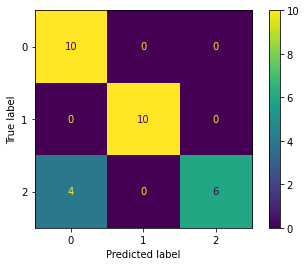

In [5]:
cm = confusion_matrix(test_y, clusters)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## 2.2 Clustering with Hierarchical clustering

In [6]:
clustering = cluster.AgglomerativeClustering(n_clusters=3)
clusters = clustering.fit_predict(test_x)
clusters

array([2, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       1, 1, 2, 0, 1, 1, 0, 0], dtype=int64)

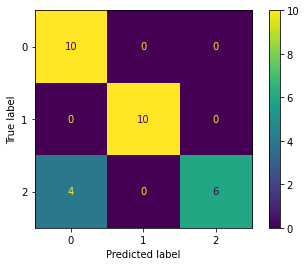

In [7]:
cm = confusion_matrix(test_y, clusters)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## 3.1 Classification with Logistic Regression

In [8]:
clf = LogisticRegression(random_state=0)
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)
pred_y

array([2, 1, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 1, 1, 0, 0])

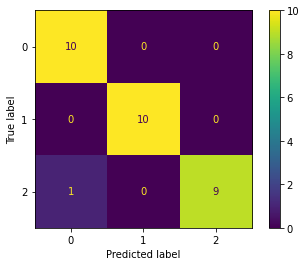

In [9]:
cm = confusion_matrix(test_y, pred_y)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## 3.2 Classification with Decision Tree

In [10]:
clf = tree.DecisionTreeClassifier()
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

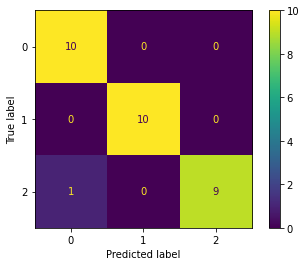

In [11]:
cm = confusion_matrix(test_y, pred_y)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

[Text(0.3, 0.9285714285714286, 'X[2] <= 2.6\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.2, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.4, 0.7857142857142857, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [40, 0, 40]'),
 Text(0.3, 0.6428571428571429, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.5, 0.6428571428571429, 'X[3] <= 1.75\ngini = 0.198\nsamples = 45\nvalue = [5, 0, 40]'),
 Text(0.2, 0.5, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [4, 0, 4]'),
 Text(0.1, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.3, 0.35714285714285715, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [2, 0, 4]'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.21428571428571427, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.3, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.5, 0.07142857142857142, 'gini = 0.0\nsa

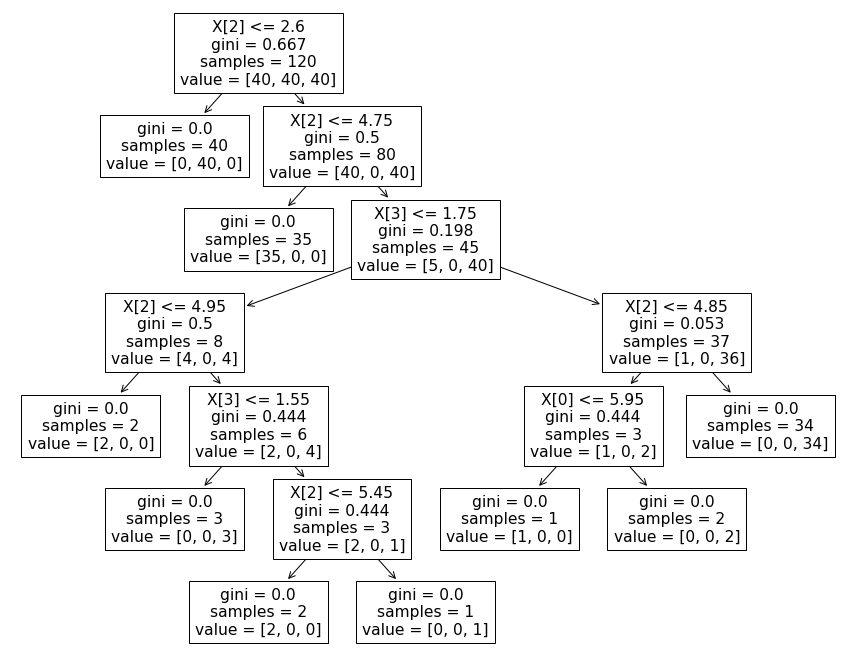

In [12]:
plt.figure(figsize=(15, 12))
tree.plot_tree(clf)